## importing lib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

### data_preprocessing 

In [2]:
dataset_train=pd.read_csv("prices-train.csv")


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
sagar=LabelEncoder()
dataset_train["symbol"]=sagar.fit_transform(dataset_train["symbol"])

In [5]:
dataset_train.shape

(272795, 7)

In [6]:
training_set=dataset_train.iloc[:,1:3]
training_set.head(4)

,symbol,open
0,453,123.430000
1,453,125.239998
2,453,116.379997
3,453,115.480003


### feature scaling 

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0, 1))
training_set[["open"]]=sc.fit_transform(training_set[["open"]])
training_set.head(3)

,symbol,open
0,453,0.157344
1,453,0.159708
2,453,0.148135


In [8]:
training_set_scaled=training_set



## creating timesteps of 60 and 1 output

In [9]:
data=[]
target=[]
for i in range(20,115795):
    data.append(training_set_scaled.iloc[i-20:i,1])
    target.append(training_set_scaled.iloc[i,1])

data,target=np.array(data),np.array(target)




In [10]:
data.dtype

dtype('float64')

In [11]:
target.dtype

dtype('float64')

## Reshaping

In [12]:
data=np.reshape(data,(data.shape[0],data.shape[1],1))


In [13]:
from sklearn.model_selection import train_test_split


In [14]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=0)

In [15]:
y_test.shape

(34733,)

In [16]:
x_test.shape

(34733, 20, 1)

In [17]:
y_train.shape

(81042,)

In [18]:
x_train.shape

(81042, 20, 1)

## LSTM

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [20]:
regressor=Sequential()

W0617 16:29:24.025681 140436201121600 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:72: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [21]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))


W0617 16:29:24.055906 140436201121600 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:515: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 16:29:24.059273 140436201121600 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4048: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 16:29:24.318014 140436201121600 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0617 16:29:24.326308 140436201121600 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3368: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will


## adding 2nd layer and some droupout regularisation

In [22]:
regressor.add(LSTM(units=500,return_sequences=True,))
regressor.add(Dropout(0.2))

## adding 3rd layer and some droupout regularisation

In [23]:
regressor.add(LSTM(units=500,return_sequences=True,))
regressor.add(Dropout(0.2))

## adding 4th layer and some droupout regularisation 

In [24]:
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

# adding final output layer 

In [25]:
regressor.add(Dense(units=1))

In [26]:
regressor.compile(optimizer='adam',loss="mean_squared_error")

W0617 16:29:25.977177 140436201121600 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/optimizers.py:782: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



## fitting the RNN to the traing set

In [27]:
regressor.fit(x_train,y_train,epochs=5,batch_size=100)

W0617 16:29:26.647969 140436201121600 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0617 16:29:30.892080 140436201121600 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:984: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
81042/81042 [==============================] - 291s 4ms/step - loss: 0.0020
Epoch 2/5
81042/81042 [==============================] - 252s 3ms/step - loss: 0.0020
Epoch 3/5
81042/81042 [==============================] - 249s 3ms/step - loss: 0.0020
Epoch 4/5
81042/81042 [==============================] - 265s 3ms/step - loss: 0.0019
Epoch 5/5
81042/81042 [==============================] - 358s 4ms/step - loss: 0.0019


# making the prediction and visualising the data 


In [28]:

sagar=regressor.predict(x_test)

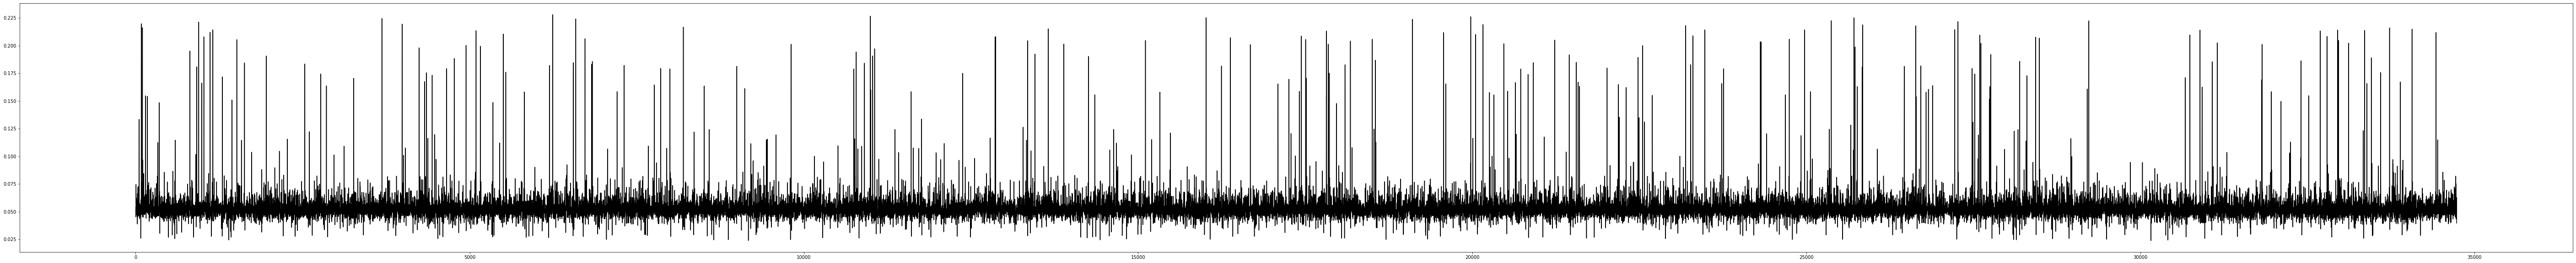

In [29]:
plt.figure(figsize=(100,10))
plt.plot(sagar,color="black")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

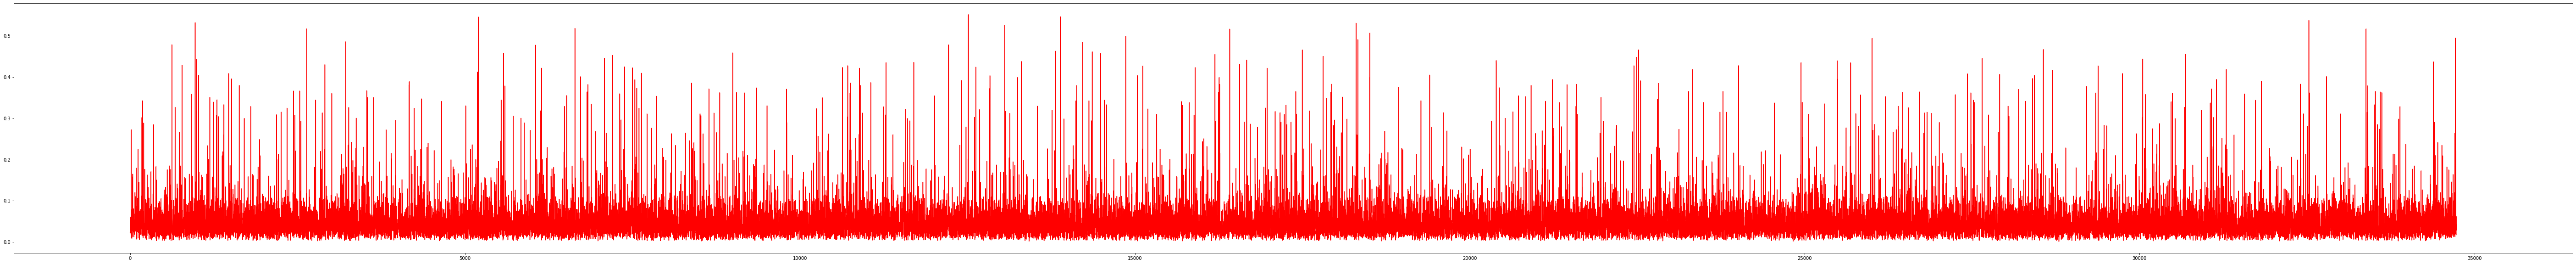

In [30]:
plt.figure(figsize=(100,10))
plt.plot(y_test,color="red")
plt.show

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(y_test,sagar)*100

3.4225252589879074